# Analysis of the Prosper Loan Data
## by Stacey Samoe

## Introduction
> Loan data from prosper is the dataset that is being used for this analysis. 
> It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> For detailed information on the various variables please find link to data dictionary: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Loading the dataset 
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Assessing Data

In [3]:
#Creating a function that will help us to programmatically access the dataset
def assessing_data(dataframe):
    #value_counts = dataframe.value_counts()
    columns = dataframe.columns
    shape_of_dataframe = dataframe.shape
    missing_data = dataframe.isnull().sum()
    duplicated_data = dataframe.duplicated().sum()
    unique_values = dataframe.nunique()
    checking_on_info = dataframe.info()
    
    return columns, shape_of_dataframe, missing_data, duplicated_data, unique_values, checking_on_info

assessing_data(loan_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

(Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
        'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
        'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
        'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
        'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
        'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
        'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
        'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
        'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
        'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
        'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
        'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
        'RevolvingCreditBalance', 'BankcardUtilization',


In [4]:
#Checking on the unique values 

for column in loan_df.columns:
    print("***************************", column, "********************************")
    print("This column has", loan_df[column].nunique(), "unique values, they are shown below:\n")
    print(loan_df[column].unique())
    print('________________________________________________________________________________________________\n')
    print('________________________________________________________________________________________________\n')

*************************** ListingKey ********************************
This column has 113066 unique values, they are shown below:

['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ..., 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
________________________________________________________________________________________________

________________________________________________________________________________________________

*************************** ListingNumber ********************************
This column has 113066 unique values, they are shown below:

[ 193129 1209647   81716 ..., 1069178  539056 1140093]
________________________________________________________________________________________________

________________________________________________________________________________________________

*************************** ListingCreationDate ********************************
This column has 113064 unique values, 

### Summary of Quality Issues

- The dataset has a total of 113937 rows and 81 columns 
- Out of the 81 columns, some have missing values to the tune of more than 50% of the data. All columns with missing data will be cleaned on a case by case basis. 

**Note: considering that fact this is a financial dataset, imputing missing data will be avoided. The aim is to ensure that insights give an accurate picture of the dataset characteristics.** 

**Data Cleaning**
  
   >  Credit Grade Column - Will be dropped as it has more than 50% missing data. 
   
   > Close date - Will also be drop as it has more than 50% missing data.
   
   > Missing values in the Estimated Effective Yield, Estimated Loss, Estimated Return, Prosper Rating (numeric & alpha), and ProsperScore among other columns who’s missing values is not less than or equal to 50%. 
   
   > Group Key column, will be dropped.
   
   > Column Total Prosper Loans all the way to ScorexChangeAtTimrOfListing column will be drooped, more than 50% missing data. 
   
   > Column LoanFirstDefaultedCycleNumber will be dropped. 

### Data Cleaning 

In [5]:
# Make copies of original pieces of data
loan_clean = loan_df.copy()

In [6]:
#Dropping columns with a huge percentage of missing values 
loan_clean.drop(['CreditGrade', 'ClosedDate', 'GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber'], axis = 1, inplace = True)

#Dropping the remaining missing values
loan_clean=loan_clean.dropna()

In [7]:
#Changing columns to appropriate data type

#To data type datetime 
loan_clean.ListingCreationDate = pd.to_datetime(loan_clean.ListingCreationDate)

In [8]:
#Test 
#Checking if the dataset is now clean

loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 69 columns):
ListingKey                            76216 non-null object
ListingNumber                         76216 non-null int64
ListingCreationDate                   76216 non-null datetime64[ns]
Term                                  76216 non-null int64
LoanStatus                            76216 non-null object
BorrowerAPR                           76216 non-null float64
BorrowerRate                          76216 non-null float64
LenderYield                           76216 non-null float64
EstimatedEffectiveYield               76216 non-null float64
EstimatedLoss                         76216 non-null float64
EstimatedReturn                       76216 non-null float64
ProsperRating (numeric)               76216 non-null float64
ProsperRating (Alpha)                 76216 non-null object
ProsperScore                          76216 non-null float64
ListingCategory (numeric)           

### What is the structure of your dataset?

> The data has 76,216 rows and 69 features. The features are of various data-types; object, integer, float and datetime. 

### What is/are the main feature(s) of interest in your dataset?

> The Loan Status, Borrow Rate and Lender Yield are among the main features I will be using in this analysis. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> On top of the main features listed above, other features that will help in the investigation include; Estimated Loss, Occupation, Debt to Income ratio, and Employment status.  

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### Question 1
1. What type of products, when it comes to tenure does the financial institution in question offer?
2. Which is their most popular product?

Text(0.5,1,'Count of the various products')

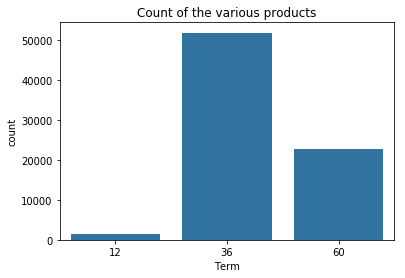

In [9]:
# Picking out a consistent colour for the visualization
base_color = sb.color_palette()[0]

# Plotting a bar chart of the various term loans
sb.countplot(data=loan_clean, x='Term', color=base_color);
plt.title('Count of the various products')

> The institution has three products, 12, 36 and 60 month long loans. The most popular product is the 36 month long loans. 

#### Question 2
What is the distrubution of the various loan status?

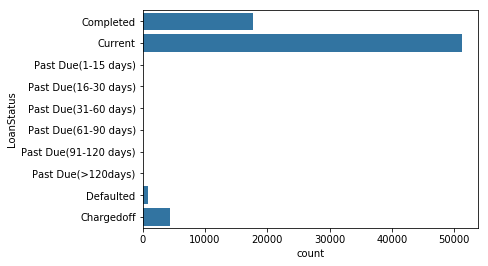

In [10]:
# Plotting a bar chart of the various loan status
# Note, base_color was defined earlier and we shall maintain the define color all through the analysis

order_by = ['Completed', 'Current', 'Past Due(1-15 days)',
         'Past Due(16-30 days)', 'Past Due(31-60 days)', 'Past Due(61-90 days)', 'Past Due(91-120 days)', 'Past Due(>120days)', 'Defaulted', 'Chargedoff']
sb.countplot(data=loan_clean, y='LoanStatus', color=base_color, order = order_by);

> Only four loan status have been triggered;
      - Current 
      - Completed 
      - Chargedoff
      - Defaulted
  Majorty of the clients fall under the current loan status.

#### Question 3 

1. What is the distribution of the Borrower Rate/Interest Rate?
2. Does the distribution indicate the risk appetite of the institution?

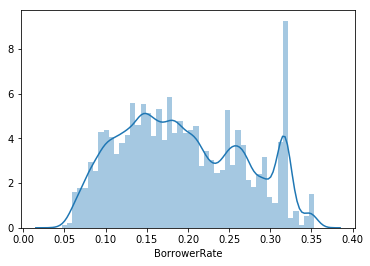

In [11]:
#Plotting the distribution of the borrower rate 
sb.distplot(loan_clean['BorrowerRate'])

> The borrow rate is slightly skewed to the right, this means that the mean value is higher than the median. And as a result the median value is a better measure of central tendency.

> **Hypothesis**: The financial institution is slightly risk tolerant, hence the slight right skewness. Clients with higher interest rates indicates clients that are more risky. 

#### Question 4

1. What is the distribution of estimated loss?
2. Is the institution making exorbitant losses? 

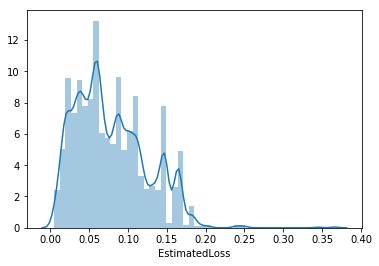

In [12]:
#Plotting the distribution of the estimated loss

sb.distplot(loan_clean['EstimatedLoss'])

> Majority of the estimated loss data points are towards the left, which indicated the estimated losses are of lower values.

#### Question 5
1. Is the financial institution in question profitable? 

Top ten Values for LenderYield is:{0.3077: 2989, 0.3099: 1329, 0.2599: 1139, 0.0999: 835, 0.1485: 706, 0.1999: 702, 0.34: 700, 0.1199: 686, 0.2099: 653, 0.2499: 650}



0.3077    2989
0.3099    1329
0.2599    1139
0.0999     835
0.1485     706
Name: LenderYield, dtype: int64

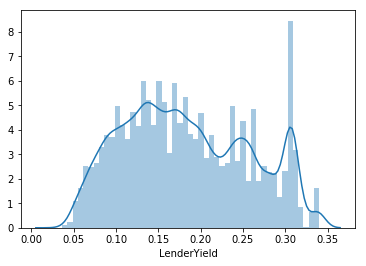

In [13]:
#Plotting the distribution of the lender yield

def univariate_visual(dataframe, column, bin=None):
    sb.distplot(dataframe[column])
    
    values = dataframe[column].value_counts(ascending=False)
    print("Top ten Values for {} is:{}\n".format(column, values.head(10).to_dict()))

    return values.head(5)

univariate_visual(loan_clean,'LenderYield')

> The distribution above shows that majority of the lender yield data points are more towards the right, meaning the company is turning positive yeilds. 

#### Question 6
1. Do the clients in this portfolio have a high number of open revolving accounts during application? 

Top ten Values for OpenRevolvingAccounts is:{5: 8317, 6: 8151, 4: 7621, 7: 7346, 8: 6255, 3: 6242, 9: 5364, 10: 4283, 2: 4249, 11: 3459}



5    8317
6    8151
4    7621
7    7346
8    6255
Name: OpenRevolvingAccounts, dtype: int64

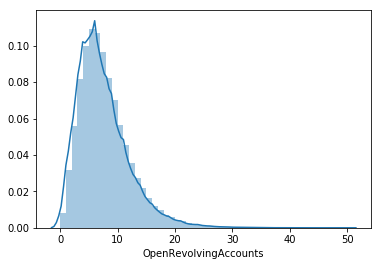

In [14]:
#Plotting the distribution number of open revolving accounts

univariate_visual(loan_clean,'OpenRevolvingAccounts')

> It is observed that most of the clients have 0 to about 13 open revolving accounts, fewer clients have more than 13 open revolving accounts. 

#### Question 7
1. What is the employment status of majority of the clients in this portfolio? 

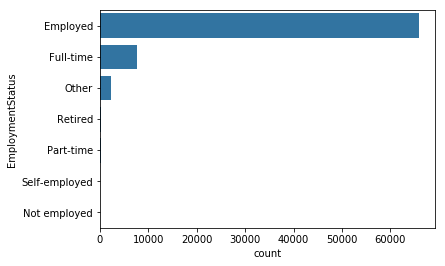

In [15]:
#Plotting the distribution of employment status

employment = loan_clean['EmploymentStatus'].value_counts().index
sb.countplot(data=loan_clean, y='EmploymentStatus', color=base_color, order=employment);

> Majority of the clients in this portfolio are employed. 

**Question 8**

What is the income range for majority of the clients?

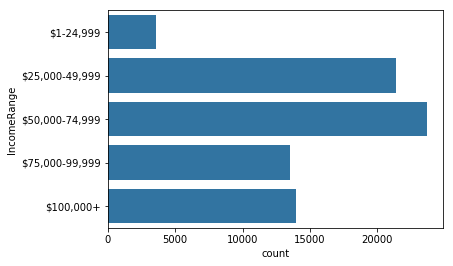

In [16]:
#Plotting the distribution of IncomeRange
irange = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.countplot(data=loan_clean, y='IncomeRange', color=base_color, order=irange);


> Majority of the clients fall under the **50,000-74,999** followed by **25,000-49,999**. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**Question 9**

What is the relationship between the various products(Terms) and the lender yield.

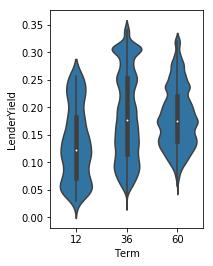

In [17]:
#Term and LenderYield using violin plots 

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=loan_clean, x='Term', y='LenderYield', color=base_color)
plt.xticks();

(-0.019099445779500228, 0.37637848690639913)

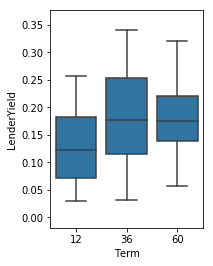

In [18]:
#Term and LenderYield using box plots 

plt.subplot(1, 2, 2)
sb.boxplot(data=loan_clean, x='Term', y='LenderYield', color=base_color)
plt.xticks();
plt.ylim(ax1.get_ylim()) 

> The product that offers a **36 months** payment period followed by the **60 month** product are the top two when it comes to the yield recived by the lender.

> **Note:** This is the same order they follow when it comes to the number of clients with said product. 

**Question 10**

What is the relationship between income range and lender yield?

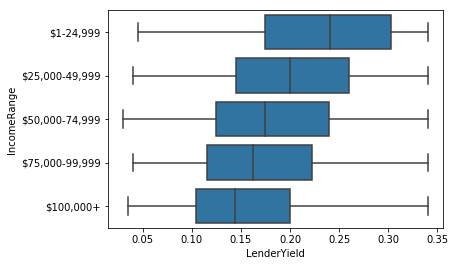

In [19]:
#Relationship between income range and lender yield

sb.boxplot(data=loan_clean, y='IncomeRange', x='LenderYield', color=base_color, order=irange)


> Clients in the **1-24,999** income range have the highest yield, followed by the **25,000-49,999** and **50,000-74,999** category respectively. 

> The **50,000-74,999** and **25,000-49,999** category have the largest client count respectively. 

**Question 11**

What is the relationship between borrower rate and estimated loss?

Text(0,0.5,'EstimatedLoss')

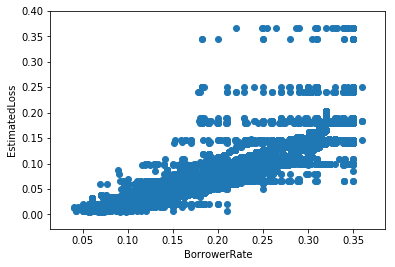

In [20]:
# Relationship between BorrowerRate and EstimatedLoss

plt.scatter(data = loan_clean, x = 'BorrowerRate', y = 'EstimatedLoss');
plt.xlabel('BorrowerRate')
plt.ylabel('EstimatedLoss')

> As the borrower rate increases the estimated loss also increases. 

> **Hypothesis:** The the higher the likely return(borrow rate), the higher the risk of loss.

**Question 12**

What is the relationship between the borrower rate and lender yield?


Text(0,0.5,'LenderYield')

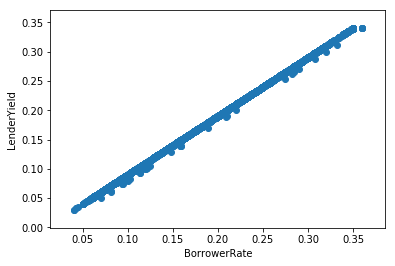

In [21]:
#Relationship between borrow rate and lender yield

plt.scatter(data = loan_clean, x = 'BorrowerRate', y = 'LenderYield');
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield')

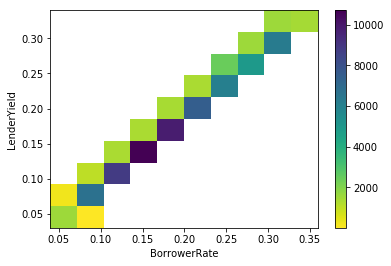

In [22]:
#Relationship between borrow rate and lender yield

plt.hist2d(data = loan_clean, x = 'BorrowerRate', y = 'LenderYield', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield');

As the borrower rate increases the lender yield also increases. 

**Question 13**

What is the relationship between open revolving accounts and estimated loss? 

Text(0,0.5,'EstimatedLoss')

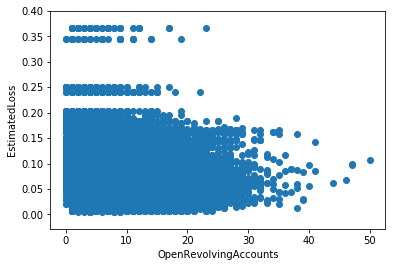

In [23]:
# OpenRevolvingAccounts vs EstimatedLoss

plt.scatter(data = loan_clean, x = 'OpenRevolvingAccounts', y = 'EstimatedLoss');
plt.xlabel('OpenRevolvingAccounts')
plt.ylabel('EstimatedLoss')

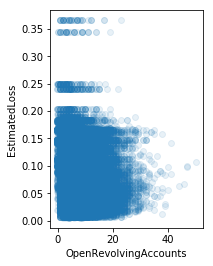

In [24]:
# OpenRevolvingAccounts vs EstimatedLoss

plt.subplot(1, 2, 1)
sb.regplot(data = loan_clean, x = 'OpenRevolvingAccounts', y = 'EstimatedLoss', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('OpenRevolvingAccounts')
plt.ylabel('EstimatedLoss');

> The is no clear relationship between open revolving accounts and estimated loss.

**Question 14**

What is the relationship between estimated loss and lender yield?

Text(0,0.5,'LenderYield')

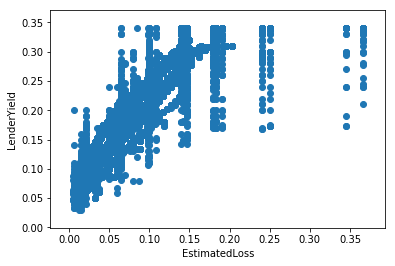

In [25]:
#Estimated loss vs lender yield

plt.scatter(data = loan_clean, x = 'EstimatedLoss', y = 'LenderYield');
plt.xlabel('EstimatedLoss')
plt.ylabel('LenderYield')

> As the estimated loss increases, the lender yield also increases. 

**Question 15**

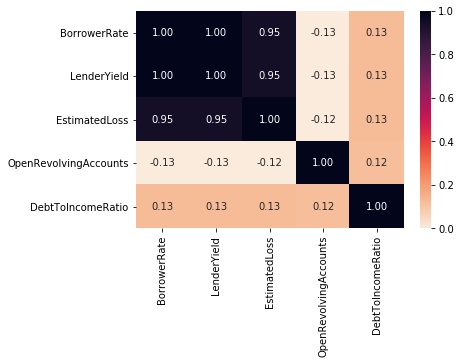

In [26]:
#Correlation between commonly used features

features = ['BorrowerRate', 'LenderYield', 'EstimatedLoss', 'OpenRevolvingAccounts', 'DebtToIncomeRatio']
sb.heatmap(loan_clean[features].corr(), cmap='rocket_r', annot = True, fmt = '.2f', vmin =0);

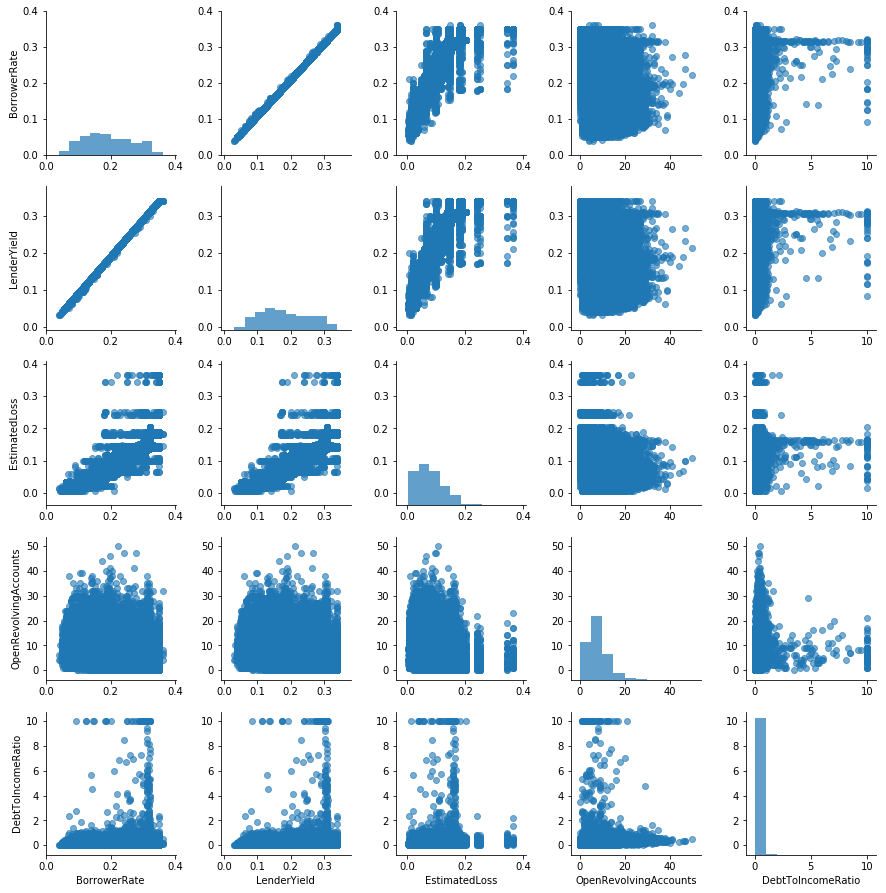

In [27]:
#Visualizing the relationships above 

relation = sb.PairGrid(data=loan_clean, vars=features);
relation = relation.map_offdiag(plt.scatter, alpha = 0.6);
relation.map_diag(plt.hist,  alpha = 0.7);

> **Observation**

> The is a strong positive correlation between borrower rate and lender yield.

> The is a weak negative correlation between borrow rate and open revolving accounts. 

> The is a weak positive correlation between debt to income ratio and lender yield.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Relationship between income range and lender yield; Clients in the **1-24,999** income range have the highest yield, followed by the **25,000-49,999** and **50,000-74,999** category respectively. 

> 2. Relationship between borrower rate and estimated loss; As the borrower rate increases the estimated loss also increases. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Relationship between borrower rate and lender yeild; As the borrower rate increases the lender yield also increases, the is a very strong correlation between the two variables.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**Question 16**

What is the relationship between estimated loss and lender yield when it comes to income range?

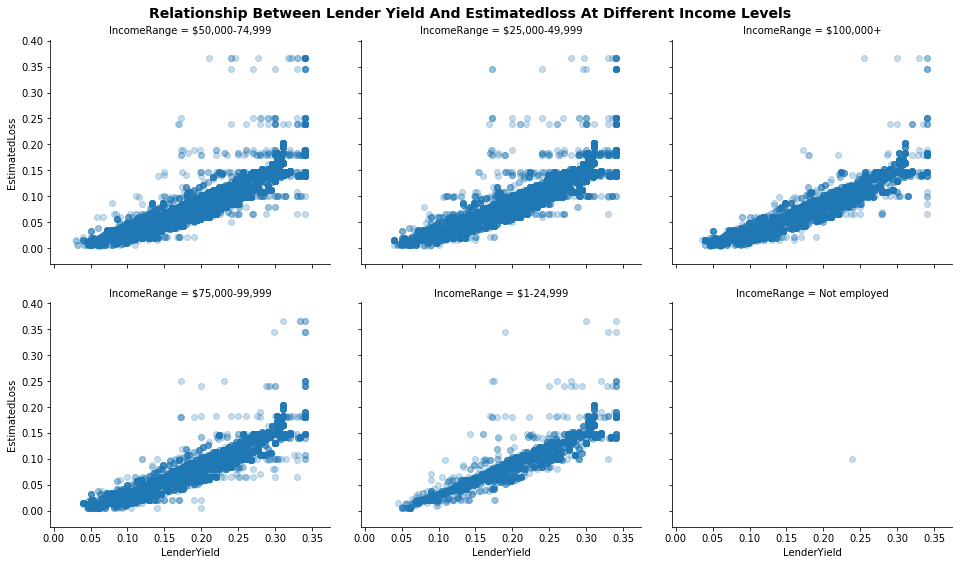

In [28]:
g = sb.FacetGrid(data=loan_clean, col='IncomeRange', col_wrap = 3)
g.map(plt.scatter, 'LenderYield', 'EstimatedLoss', alpha=0.25)
g.set_xlabels('LenderYield')
g.set_ylabels('EstimatedLoss')
g.fig.set_size_inches(14,8);
plt.suptitle('Relationship between lender yield and estimatedloss at different income levels'.title(), y=1, fontsize=14, weight='bold')
plt.show();

> As the income increases, the lender yield also increases across all income ranges. 

**Question 17**
What is the relationship betweem lender yield and estimated loss when it comes to the various terms

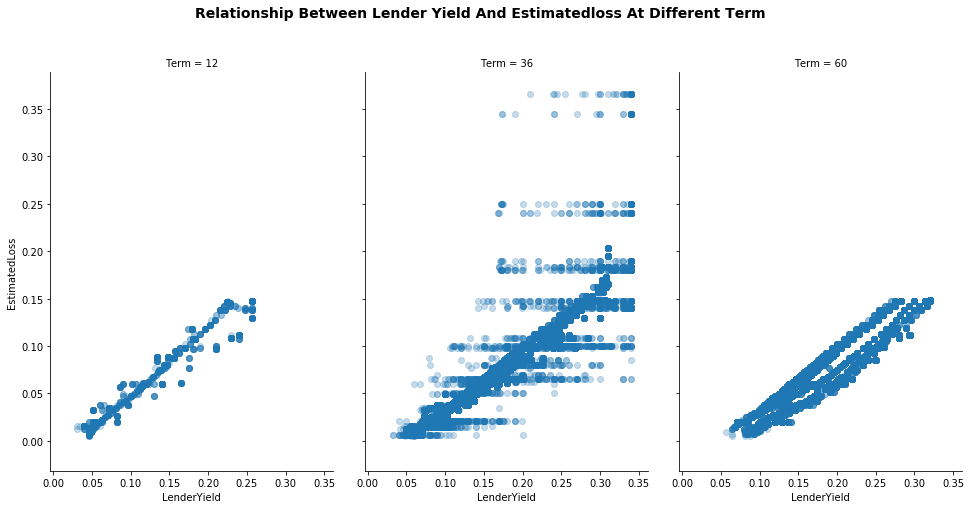

In [29]:
#Term - LenderYield vs EstimatedLoss

g = sb.FacetGrid(data=loan_clean, col='Term', col_wrap = 3)
g.map(plt.scatter, 'LenderYield', 'EstimatedLoss', alpha=0.25)
g.set_xlabels('LenderYield')
g.set_ylabels('EstimatedLoss')
g.fig.set_size_inches(14,8);
plt.suptitle('Relationship between lender yield and estimatedloss at different Term'.title(), y=1, fontsize=14, weight='bold')
plt.show();

> As the estimated loss increases the lender yield also increases, term 36 are observed more on the higher end compared to term 60 and 12. Term 60 and 12 estimated loss rate is not as high as that of term 36. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>**Estimated loss, Lender yield and Term**

> As the estimated loss increases the lender yield also increases, term 36 are observed more on the higher end compared to term 60 and 12. Term 60 and 12 estimated loss rate is not as high as that of term 36.

### Were there any interesting or surprising interactions between features?

> The weak positive correlation between debt to income ratio and lender yield, the initial assumption was income ratio would negatively correlate with lender yield. 

## Conclusions
>The most popular product, 36 term loans are profitable. This can be seen through the multivariate analysis of term, lender yield and estimated loss.
 
>The institution’s loan status mainly falls under current and completed loan status, this is an indicator of a healthy portfolio. 



In [30]:
#Creating a copy of the clean dataset
loan_clean.to_csv('loan_clean_master.csv')

In [31]:
#Creating a HTML
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0